<a href="https://colab.research.google.com/github/furkantektas/ioc_presentation/blob/master/HandwrittenDigitRecognition_IoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RECOGNIZING HAND WRITTEN DIGITS WITH AI



---


## PREPARING DATA



In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import seaborn as sns
from fastai.vision import *
from fastai.metrics import accuracy

sns.set_context("talk")
sns.set_style("white")

class DigitRecognition:
  def __init__(self):
    self.bs = 64
    print("Downloading data")
    path = untar_data(URLs.MNIST)
    il = ImageList.from_folder(path,convert_mode="L")
    defaults.camp = "binary"
    sd = il.split_by_folder(train="training",valid="testing")
    l1 = sd.label_from_folder()
    self.interpreter = None
    self.model = None
    self.learner = None

    tfms = ([*rand_pad(padding=3,size=28,mode="zeros")],[])

    l1 = l1.transform(tfms)
    self.data = l1.databunch(bs=self.bs).normalize()
    print("Handwritten digits downloaded.\n Available data: \n\t{}: Training\n\t"
         "{}: Validation".format(self.data.train_dl.dl.dataset.x.items.shape[0], 
                                                self.data.valid_dl.dl.dataset.x.items.shape[0]))
    
  def visualizeBunch(self):
    self.data.show_batch(row=4, cmap='gray_r')
    
    
  def createModel(self, metrics=[accuracy, error_rate]):
    def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)
    self.model = nn.Sequential(
        conv(1, 8), # 14
        nn.BatchNorm2d(8),
        nn.ReLU(),
        conv(8, 16), # 7
        nn.BatchNorm2d(16),
        nn.ReLU(),
        conv(16, 32), # 4
        nn.BatchNorm2d(32),
        nn.ReLU(),
        conv(32, 16), # 2
        nn.BatchNorm2d(16),
        nn.ReLU(),
        conv(16, 10), # 1
        nn.BatchNorm2d(10),
        Flatten()     # remove (1,1) grid
    )
    self.learner = Learner(self.data, self.model, loss_func = nn.CrossEntropyLoss(), metrics=metrics)
    print("AI model created.")
    

  def overview(self):
    self.learner.lr_find(end_lr=100)
    self.learner.recorder.plot()
    
  def learn(self, iteration=3, learning_speed=0.01):
    self.learner.fit_one_cycle(iteration, max_lr=learning_speed)
    
  def visualizeLosses(self, k):
    self.learner.plot_top_losses(k)
    
  def diagnose(self, k):
    self.interpreter = self.learner.interpret()
    self.interpreter.plot_top_losses(k=k)



## STARTING DIGIT RECOGNITION

In [11]:
digitRecognition = DigitRecognition()

Handwritten digits downloaded.
 Available data: 
	60000: Training
	10000: Validation


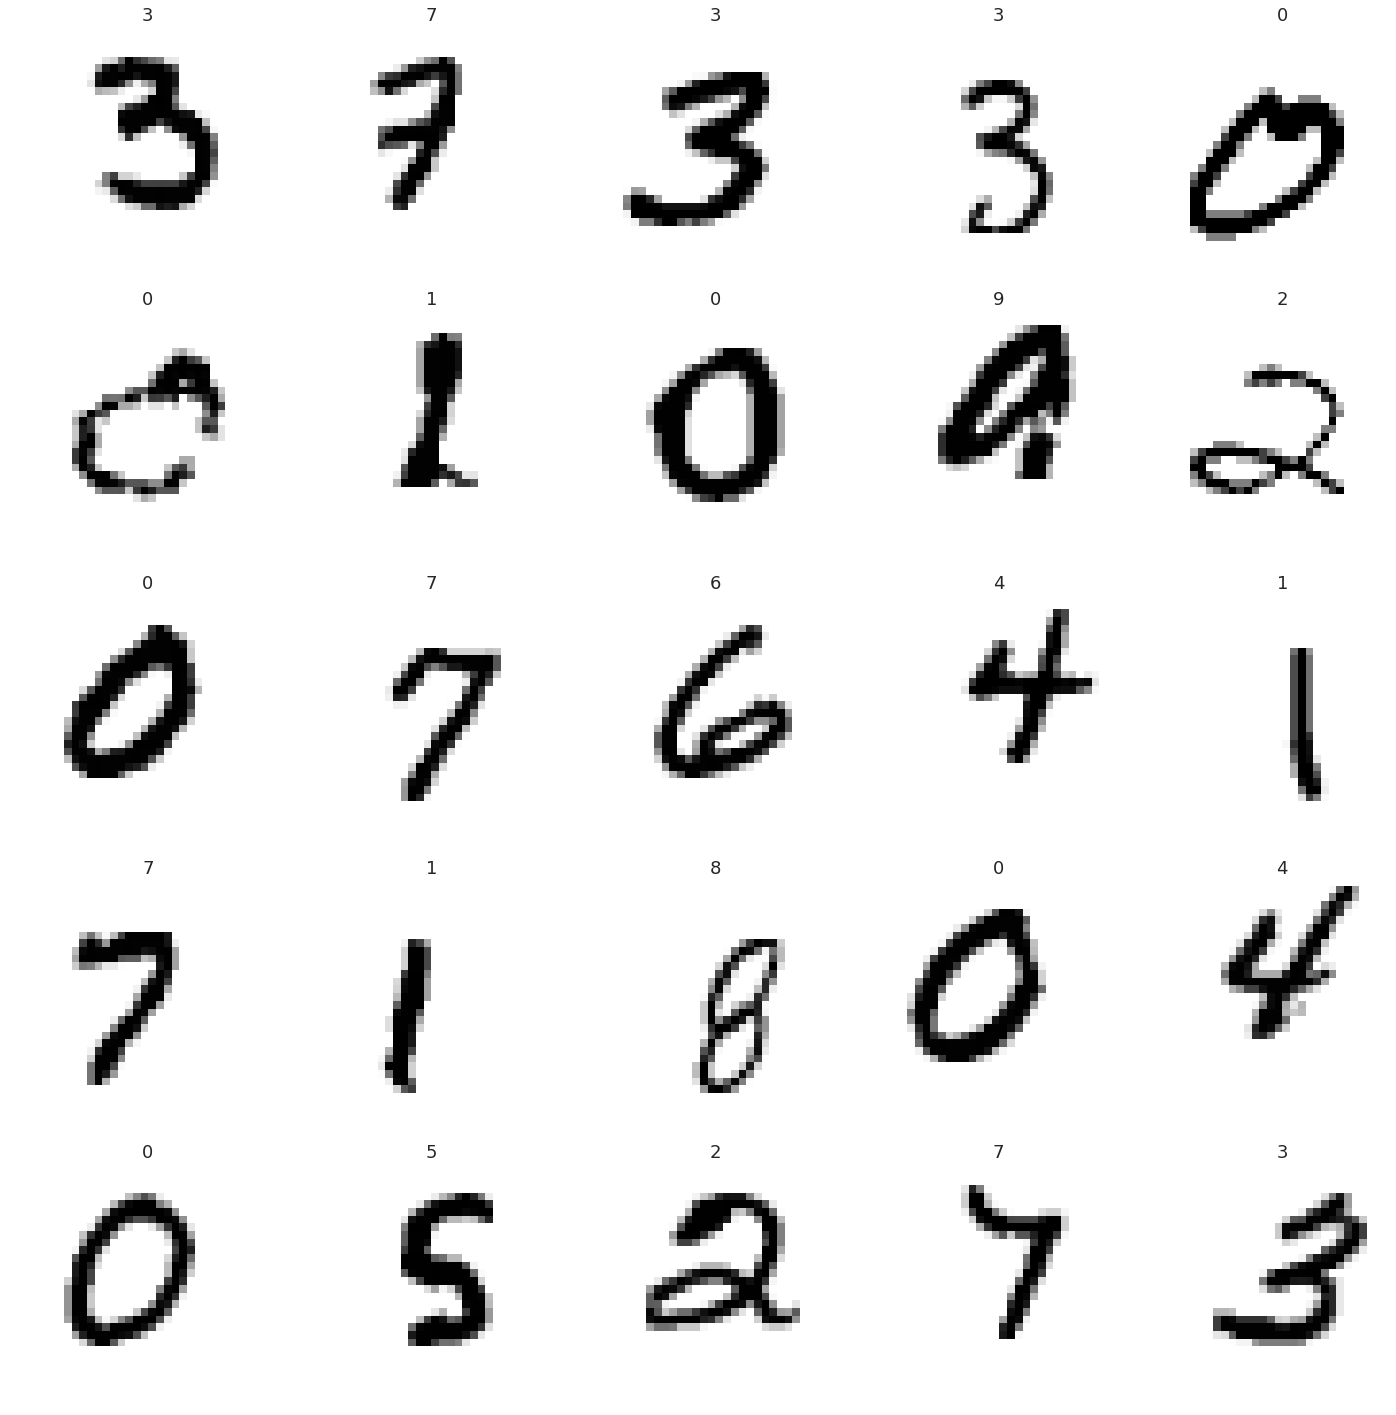

In [13]:
digitRecognition.visualizeBunch()

## HOW IT WORKS?

<img width="100%" src="https://thumbs.gfycat.com/BiodegradableMildGraysquirrel-size_restricted.gif" />

Reference: [3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKk)

## DATASET

In [14]:
digitRecognition.createModel()

AI model created.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


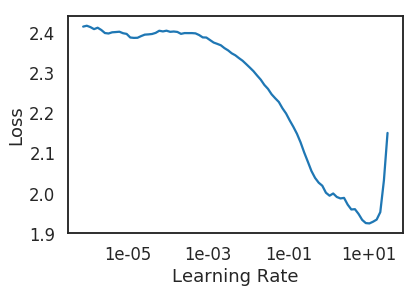

In [15]:
digitRecognition.overview()

In [16]:
digitRecognition.learn(iteration=3, learning_speed=1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.545454,0.895987,0.738200,0.261800,00:42
1,0.413829,1.121765,0.633100,0.366900,00:43
2,0.141319,0.074226,0.975800,0.024200,00:43


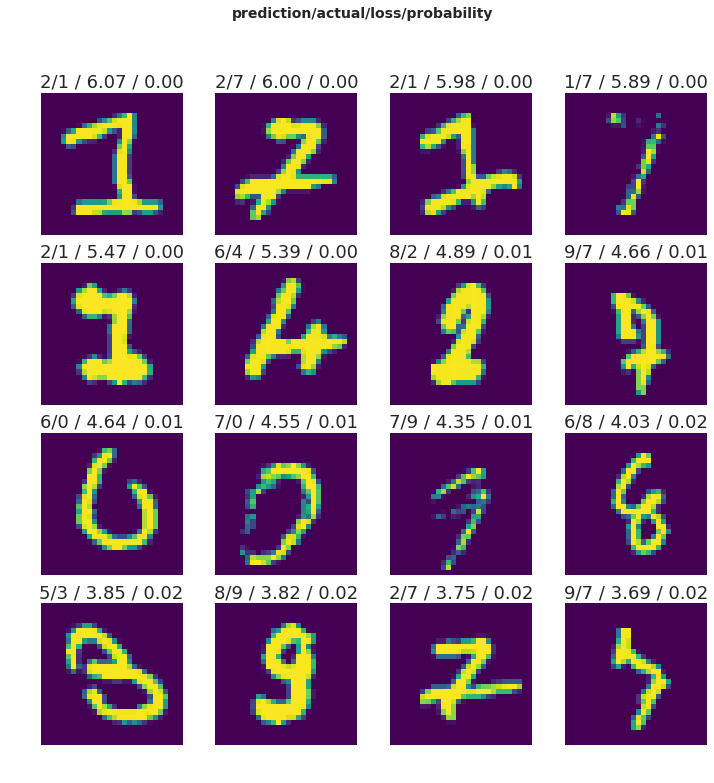

In [17]:
digitRecognition.diagnose(16)

# Try it!


<img width="100%" src="https://storage.googleapis.com/replit/images/1544788889542_9a1a18ed7e22f6bd88d6691aab98ca35.gi" />



#[Online Demo](https://neuralnetwork.ieatpython.repl.co/)